In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# This is the raw data from the Spark plate reader at ambient pCO2. Will smooth it for plotting. 
glycerol_df = pd.read_csv('data/083119_spark_m9glycerol_ambient_raw.csv')

In [3]:
# Smoothing is windowed mean twice over a 3 measurement window
# Note: not blanking here because it makes it very hard to show data in log scale.
od_cols = glycerol_df.columns[1:-1]
smoothed_gly = glycerol_df.copy()
smoothed_gly[od_cols] = smoothed_gly[od_cols].rolling(3, min_periods=1).apply(np.nanmean)
smoothed_gly[od_cols] = smoothed_gly[od_cols].rolling(3, min_periods=1).apply(np.nanmean)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [4]:
rub_alone = ['lsPrk.3', 'lsPrk.4'] # two bio replicates
full_ccm_bio_reps = ['rec.%d.1' % i for i in [1,2,4]] # 3 bio replicates

In [5]:
# Make a color palettes to colors replicates differently.
greys = sns.color_palette('Greys', n_colors=8)
greens = sns.color_palette('Greens', n_colors=8)
blue_greens = sns.color_palette("GnBu_d", n_colors=12)
purples = sns.color_palette('Purples', n_colors=8)
reddish_purple = sns.set_hls_values(sns.xkcd_rgb['reddish purple'], 0.9, 0.3, 1)

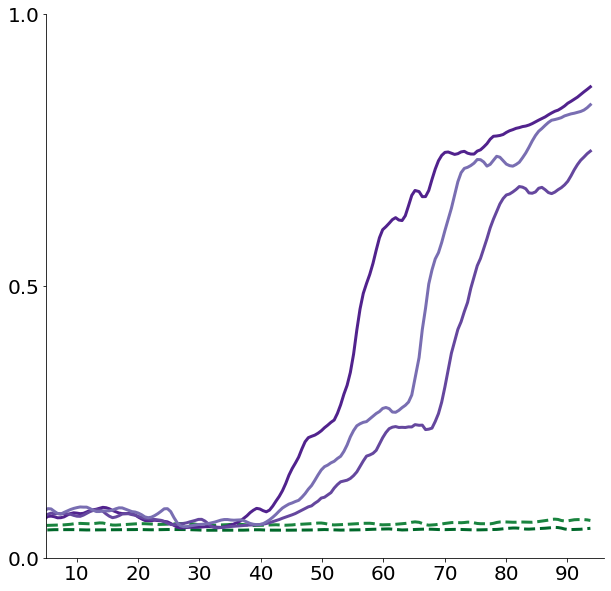

In [6]:
figure = plt.figure(figsize=(10,10))

# glycerol data
time_h_gly = smoothed_gly.time_s / (60*60)

for i, name in enumerate(rub_alone):
    if i >= 3: break
    c = greens[-i-1]
    plt.plot(time_h_gly, smoothed_gly[name], color=c, lw=3, ls='--')

for i, name in enumerate(full_ccm_bio_reps):
    if i >= 3: break
    c = purples[-i-1]
    plt.plot(time_h_gly, smoothed_gly[name], color=c, lw=3)

    
plt.xticks(np.arange(0, 91, 10), fontsize=20)
plt.yticks(np.arange(0, 1.05, 0.5), fontsize=20)
plt.xlim(5, 96)
sns.despine()
#plt.savefig('CCMB1_13.6_growth_curves.png', dpi=600)

plt.show()